In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv("diabetes.csv")  
print("Dataset Loaded Successfully")
print(df.head())
print(df.info())

Dataset Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4 

In [3]:
print("\nMissing Values in Each Column:\n", df.isnull().sum())


Missing Values in Each Column:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [5]:
X = df.drop('Outcome', axis=1)   
y = df['Outcome']              

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nData Split Done")
print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)


Data Split Done
Training Data: (614, 8)
Testing Data: (154, 8)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)  # k = 5
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn.predict(X_test)

In [10]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


In [11]:
print("\nEvaluation Metrics ")
print("Confusion Matrix:\n", cm)
print("Accuracy:", round(accuracy, 3))
print("Error Rate:", round(error_rate, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))


📊 Evaluation Metrics 📊
Confusion Matrix:
 [[79 20]
 [27 28]]
Accuracy: 0.695
Error Rate: 0.305
Precision: 0.583
Recall: 0.509


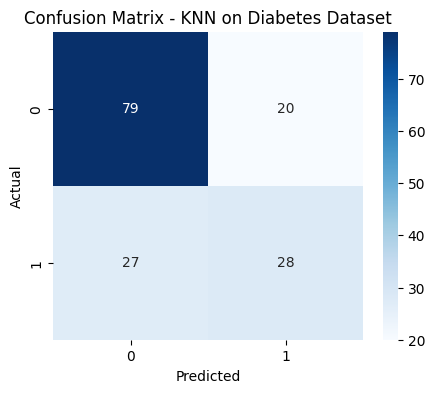

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN on Diabetes Dataset')
plt.show()
